<a href="https://colab.research.google.com/github/xHexlabx/AI-models/blob/main/Mnist%20Classification/Mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP image classification


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
datasets = tf.keras.datasets.mnist.load_data()

In [ ]:
(xtrain , ytrain) , (xtest , ytest) = datasets

In [ ]:
print(xtrain.shape , ytrain.shape , xtest.shape , ytest.shape)

In [ ]:
ytrain[0]

In [ ]:
xtrain = xtrain.reshape([-1 , 28 * 28])
xtest  = xtest.reshape(-1 , 28 * 28)

In [ ]:
#normalize
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [ ]:
#one-hot encoding 
ytrain = tf.keras.utils.to_categorical(ytrain , num_classes = 10 , dtype = 'float32')
ytest = tf.keras.utils.to_categorical(ytest , num_classes= 10 , dtype = 'float32')

In [ ]:
print(xtrain.shape , ytrain.shape , xtest.shape , ytest.shape)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256 , input_shape = (28 * 28 , ) , activation = 'relu'))
model.add(tf.keras.layers.Dense(256 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))
model.compile(loss = 'mse' , optimizer = 'sgd' , metrics = 'accuracy')
model.summary()

In [18]:
model.fit(xtrain , ytrain , epochs = 50 , validation_data = (xtest , ytest))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9871 - val_loss: 0.7017 - val_accuracy: 0.9047
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364 - accuracy: 0.9873 - val_loss: 0.7416 - val_accuracy: 0.9009
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0329 - accuracy: 0.9882 - val_loss: 0.7775 - val_accuracy: 0.9009
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0344 - accuracy: 0.9880 - val_loss: 0.7097 - val_accuracy: 0.9040
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0340 - accuracy: 0.9882 - val_loss: 0.7468 - val_accuracy: 0.9024
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 0.7479 - val_accuracy: 0.9029
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9896 - val_loss: 0.8107 - val_accuracy:

In [ ]:
z = model.predict(xtest)

In [ ]:
print(np.sum(z.argmax(axis = 1) == ytest.argmax(axis = 1)) / len(ytest) * 100 , '%')

In [ ]:
ytest[0].argmax()

In [ ]:
z[0].argmax()

# CNN image classification

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
datasets = tf.keras.datasets.mnist.load_data()
(xtrain  , ytrain) , (xtest , ytest) = datasets

In [ ]:
plt.imshow(xtrain[0] , cmap = 'gray')
plt.show()

In [ ]:
#normalize
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [ ]:
xtrain.shape

In [ ]:
xtrain = xtrain[ : , : , : , None] ;
xtest = xtest[ : , : , : , None]

In [ ]:
#resize
xtrain = tf.image.resize(xtrain , (32 , 32) )
xtest = tf.image.resize(xtest ,(32 , 32) )

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16 , (5 , 5) , input_shape = (32 , 32 , 1), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(8 , (5 , 5) , activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(64 , activation  = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation  = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'sgd' , metrics = 'accuracy')
#sparse no need to one-hot encoding 

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model , show_shapes = True)

In [ ]:
model.fit(xtrain , ytrain , epochs = 50 , validation_data = (xtest, ytest))

In [ ]:
z = model.predict(xtest)

In [ ]:
print(np.sum(z.argmax(axis = 1) == ytest) / len(ytest) * 100 , '%')


In [ ]:
z.shape

In [ ]:
ytest.shape

# Fashion Mnist CNN image classification

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot  as plt

In [2]:
datasets = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(xtrain , ytrain) , (xtest , ytest) = datasets

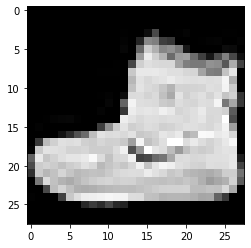

In [4]:
plt.imshow(xtrain[0]  , cmap = 'gray')

In [5]:
xtrain = xtrain[ : , : , : , None]
xtest = xtest [ : , : , : , None]

In [6]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [7]:
print(xtrain.shape , xtest.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
model  = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16 , (5 , 5) , input_shape = (28 , 28 , 1) , activation = 'relu'  , padding = 'same') )
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(8 , (5 , 5) , input_shape = (28 , 28 , 1) , activation = 'relu'  , padding = 'same') )
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(64 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = 'accuracy')

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 8)         3208      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [15]:
model.fit(xtrain, ytrain , epochs = 50 , validation_data = (xtest , ytest))

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4996 - accuracy: 0.8190 - val_loss: 0.4164 - val_accuracy: 0.8464
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3295 - accuracy: 0.8787 - val_loss: 0.3159 - val_accuracy: 0.8828
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2844 - accuracy: 0.8953 - val_loss: 0.3051 - val_accuracy: 0.8853
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2579 - accuracy: 0.9036 - val_loss: 0.3054 - val_accuracy: 0.8870
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2361 - accuracy: 0.9123 - val_loss: 0.2965 - val_accuracy: 0.8965
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2183 - accuracy: 0.9191 - val_loss: 0.2700 - val_accuracy: 0.9016
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2033 - accuracy: 0.9230 - val_loss: 0.2739 - val_accuracy:

In [16]:
z = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [17]:
print(np.sum(z.argmax(axis = 1) == ytest) / len(ytest) * 100 , '%')

90.58 %
